In [12]:
%matplotlib inline    
import matplotlib as mplt
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')

import statsmodels as sm
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.api import VAR, DynamicVAR

from statsmodels.stats import diagnostic

from utils_libs import *
from utils_data_prep import *
from mixture import *

In [13]:
# ---- set-up ----

# ---- MAPE
def eval_mape(df):
    
    diff = df['truth'] - df['pre']
    tmp = (abs(diff)/(df['truth']+1e-10))

    tmpsum = []
    for i in range(len(tmp)):
        if abs(df['truth'].iloc[i])>1e-5:
            tmpsum.append( tmp[i] )
                    
    return mean(tmpsum)

# ---- RMSE
def eval_rmse(df):
    return sqrt(mean((df['truth']-df['pre'])**2))
    
# ---- ACCURACY
col_format_mix = ['truth', 'pre', 'pre_v', 'pre_b']
col_format_gate = ['vol', 'ob']
col_format = ['truth', 'pre']

features_ob = [ 'spread', 'weightd spread', 'ask vol.', 'bid vol.', 'vol. diff.', 'ask depth', 'bid depth', \
               'depth diff.', 'bid slope', 'ask slope']

models = ['gbt', 'rf', 'xgt', 'bayes', 'gp', 'enet', 'ridge']
# 'arima', arimax', 'lasso', 'str', 'strx', 'garch', 'egarch'

file_path = "../bt_results/res/rolling/"

pre_ts = 'pytest_'
pre_tr = 'pytrain_'

gate_ts = 'gate_test'
gate_tr = 'gate_train'

post_txt = '.txt'
post_dat = '.dat'

weight_pre = '_weight_pre'
weight_gate = '_weight_gate'

bin_bound = []
for i in range(50):
    bin_bound.append(i*0.02)


In [19]:
print ' --- RMSE'
# RMSE
for i in range(2,14):
    
    tmp_rmse = []
    
    file_name = str(i) + '_' + pre_ts + 'mix' + post_txt
    df = pd.read_csv( file_path + file_name, sep=',', names = col_format_mix)
    
    tmp_rmse.append( eval_rmse(df) )
    
    for tmp_mdl in models:
        
        file_name = str(i) + '_' + pre_ts + tmp_mdl + post_txt
        df = pd.read_csv( file_path + file_name, sep=',', names = col_format)
        
        tmp_rmse.append( eval_rmse(df) )
        
    print 'interval ', i, ': ', tmp_rmse
    

print ' --- MAPE'
# MAPE
for i in range(2,14):
    
    tmp_rmse = []
    tmp_mape = []
    
    file_name = str(i) + '_' + pre_ts + 'mix' + post_txt
    df = pd.read_csv( file_path + file_name, sep=',', names = col_format_mix)
    
    tmp_mape.append( eval_mape(df) )
    
    for tmp_mdl in models:
        
        file_name = str(i) + '_' + pre_ts + tmp_mdl + post_txt
        df = pd.read_csv( file_path + file_name, sep=',', names = col_format)
        
        tmp_mape.append( eval_mape(df) )
        
    print 'interval ', i, ': ', tmp_mape

    

 --- RMSE
interval  2 :  [0.074177537145904623, 0.088393956171109192, 0.078211463087352578, 0.083732267960057422, 0.08783687699442061, 0.087825280244581083, 0.078092453459051733, 0.083009415488212029]
interval  3 :  [0.057819551249493742, 0.064614483591748081, 0.060024253643625521, 0.059368972068381091, 0.065811029560769577, 0.063393061303392853, 0.058990643361074555, 0.061007591860943157]
interval  4 :  [0.04351144859331612, 0.048029502076402684, 0.045798185050094808, 0.045505068586124638, 0.047460971694223406, 0.047127068068155892, 0.046707556262830713, 0.047147063738557725]
interval  5 :  [0.1092802291066071, 0.11547183883520619, 0.12682473354671084, 0.11137653643301758, 0.11366155409123714, 0.11330439195792741, 0.1099800318613271, 0.10998003186132713]
interval  6 :  [0.057364948552575012, 0.063356698192017183, 0.061469125277998117, 0.059691761315813566, 0.058496711410308745, 0.083339027941627647, 0.059050614706894454, 0.058528552712739414]
interval  7 :  [0.076923424200592741, 0.08

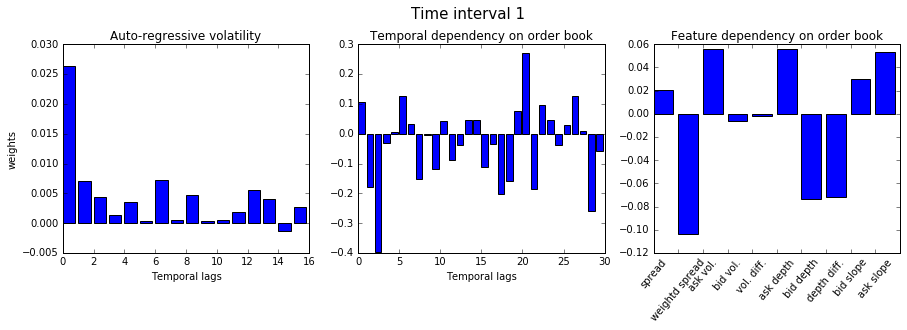

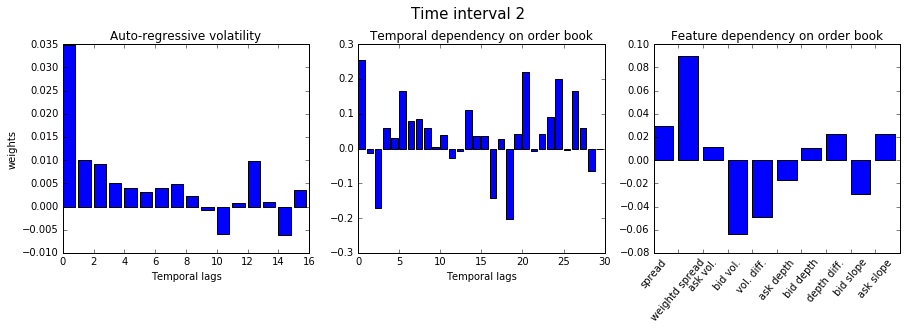

In [37]:
# parameter distribution of mixture prediction

# weight[0] vol temporal, [1] vol bias, [2] order book temporal, [3] order book feature, [4] bias 

for i in range(2,4):
    
    file_name = str(i) + weight_pre + post_dat
    tmp_weight = np.load(file_path + file_name)
    
    fig, ax_list = plt.subplots(1, 3, figsize=(15,4))
    fig.suptitle("Time interval " + str(i-1), fontsize = 15)
    
    ax_list[0].bar(range(len(np.squeeze(tmp_weight[0]))), np.flip(np.squeeze(tmp_weight[0]),0) )
    ax_list[0].set_title('Auto-regressive volatility')
    ax_list[0].set(xlabel='Temporal lags', ylabel='weights')
    
    ax_list[1].bar(range(len(np.squeeze(tmp_weight[2]))), np.flip(np.squeeze(tmp_weight[2]),0) )
    ax_list[1].set_title('Temporal dependency on order book')
    ax_list[1].set(xlabel='Temporal lags')
    
    ax_list[2].bar( range(len(np.squeeze(tmp_weight[3])) ), np.squeeze(tmp_weight[3]))
    ax_list[2].set_title('Feature dependency on order book')
    tmp_ind = range(len(np.squeeze(tmp_weight[3])))
    
    plt.xticks( tmp_ind , features_ob, rotation=50 )
    plt.subplots_adjust(top=0.85)

In [21]:
# parameter distribution of mixture gate

# weight[0] vol temporal, [1] vol bias, [2] order book temporal, [3] order book feature, [4] bias 
    

for i in range(2,14):
    
    file_name = str(i) + weight_gate + post_dat
    tmp_weight = np.load(file_path + file_name)
    
    tmp_weight = np.abs(tmp_weight)
    
    fig, ax_list = plt.subplots(1, 3, figsize=(15,4))
    fig.suptitle("Time interval " + str(i-1), fontsize = 15)
    
    ax_list[0].bar(range(len(np.squeeze(tmp_weight[0]))), np.flip(np.squeeze(tmp_weight[0]),0) )
    ax_list[0].set_title('Auto-regressive volatility')
    ax_list[0].set(xlabel='Temporal lags', ylabel='weights')
    
    ax_list[1].bar(range(len(np.squeeze(tmp_weight[2]))), np.flip(np.squeeze(tmp_weight[2]),0) )
    ax_list[1].set_title('Temporal dependency on order book')
    ax_list[1].set(xlabel='Temporal lags')
    
    ax_list[2].bar( range(len(np.squeeze(tmp_weight[3])) ), np.squeeze(tmp_weight[3]))
    ax_list[2].set_title('Feature dependency on order book')
    tmp_ind = range(len(np.squeeze(tmp_weight[3])))
    
    plt.xticks( tmp_ind , features_ob, rotation=50 )
    plt.subplots_adjust(top=0.85)
#     plt.show()

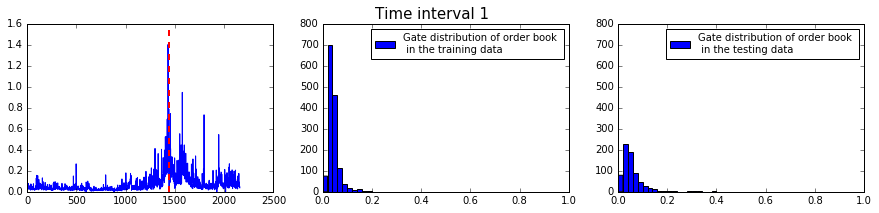

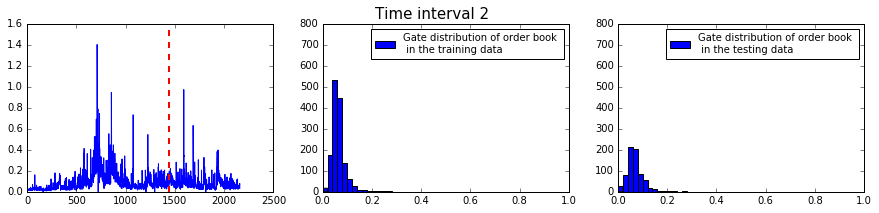

In [35]:
bin_bound = []
for i in range(50):
    bin_bound.append(i*0.02)

for i in range(2,4):
    
    # truth in training 
    file_name = str(i) + '_' + pre_tr + 'mix' + post_txt
    df = pd.read_csv( file_path + file_name, sep=',', names = col_format_mix)
    y_tr = list(df['truth'])
    
    # truth in testing
    file_name = str(i) + '_' + pre_ts + 'mix' + post_txt
    df = pd.read_csv( file_path + file_name, sep=',', names = col_format_mix)
    y_ts = list(df['truth'])
    
    # gates in training
    file_name = str(i) + '_' + gate_tr + post_txt
    df_tr = pd.read_csv( file_path + file_name, sep=',', names = col_format_gate )
    
    # gates in testing
    file_name = str(i) + '_' + gate_ts + post_txt
    df_ts = pd.read_csv( file_path + file_name, sep=',', names = col_format_gate )
    
    # plot
    fig, ax = plt.subplots(1, 3, figsize=(15,3))
    fig.suptitle("Time interval " + str(i-1), fontsize = 15)
    
    ax[0].plot(y_tr + y_ts, label = 'Volatility series in training and testing set')
    ax[0].axvline( len(y_tr), color = 'r', linewidth = 2.0, linestyle = '--' )
    
    ax[1].hist(df_tr['ob'], histtype='bar', bins = bin_bound,  \
               label='Gate distribution of order book \n in the training data ')
    ax[1].set_ylim(0,800)
    ax[1].legend(fontsize=10)
    
    ax[2].hist(df_ts['ob'], histtype='bar', bins = bin_bound,  \
               label='Gate distribution of order book \n in the testing data')
    ax[2].set_ylim(0,800)
    ax[2].legend(fontsize=10)
#     ax.legend()
#     ax.set_ylim(0,350)
#     ax.set_xlim(0,1.0)
#     plt.axvline( len(y_tr), color = 'r', linewidth = 2.0, linestyle = '--' )
#     plt.title("Time interval " + str(i-1), fontsize = 15)
    
    
    

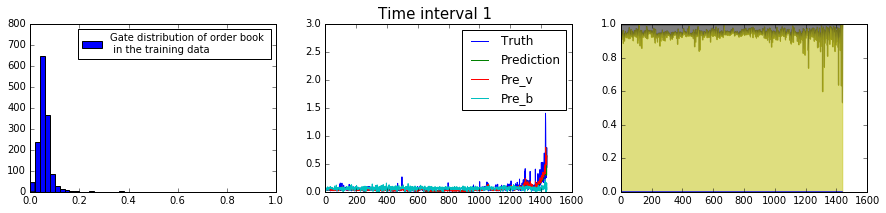

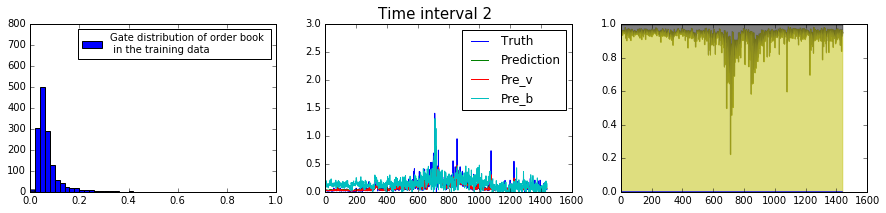

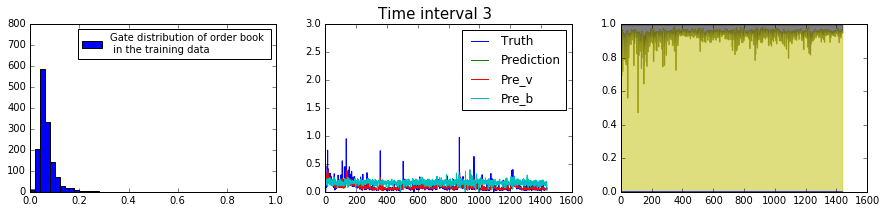

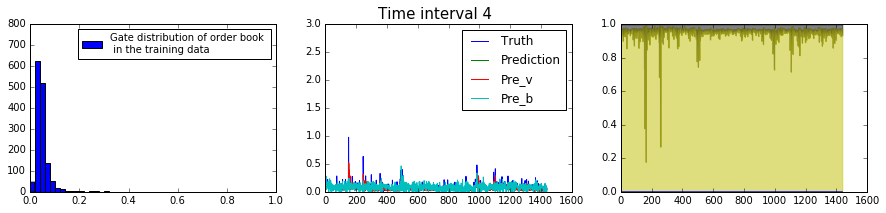

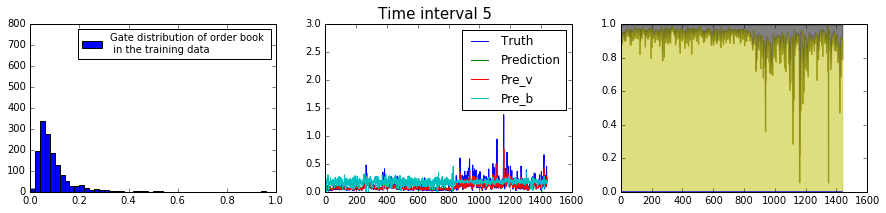

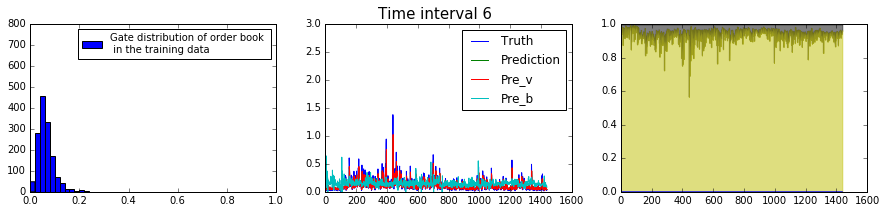

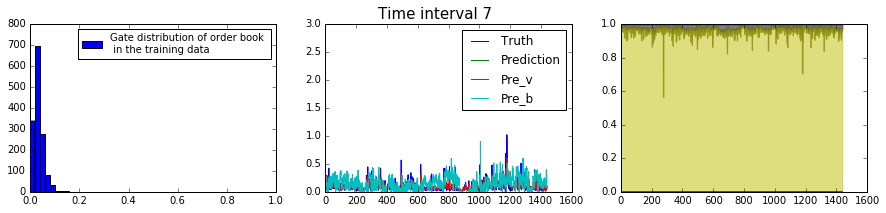

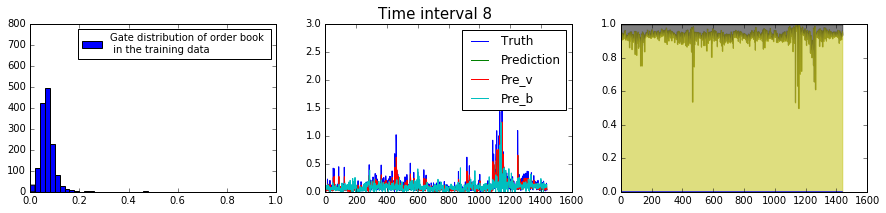

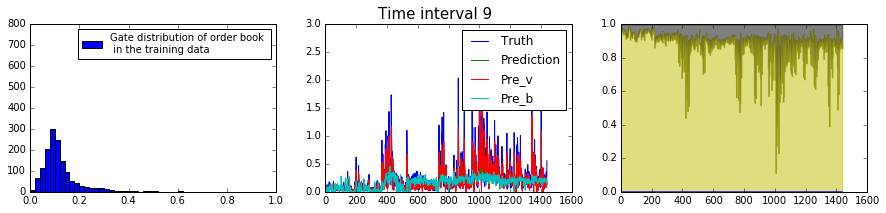

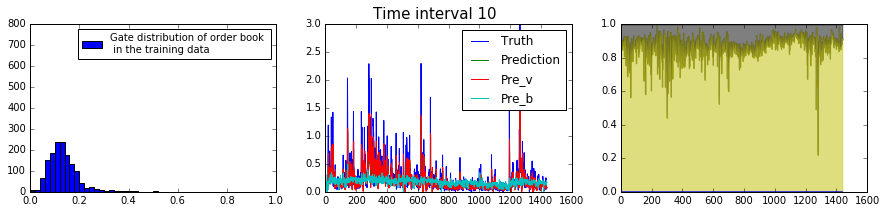

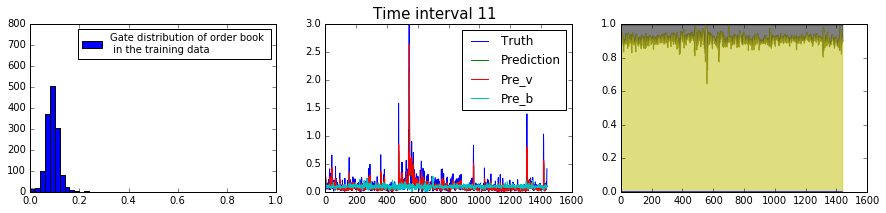

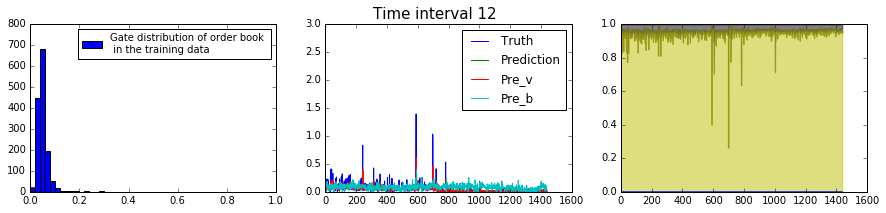

In [15]:
# training data

bin_bound = []
for i in range(50):
    bin_bound.append(i*0.02)

for i in range(2, 14):
    
    # truth in training 
    file_name = str(i) + '_' + pre_tr + 'mix' + post_txt
    df_pre = pd.read_csv( file_path + file_name, sep=',', names = col_format_mix)
    
    # gates in training
    file_name = str(i) + '_' + gate_tr + post_txt
    df_gate = pd.read_csv( file_path + file_name, sep=',', names = col_format_gate )
    tmp_gate = np.asarray(df_gate)
    
    # plot
    fig, ax = plt.subplots(1, 3, figsize=(15,3))
    fig.suptitle("Time interval " + str(i-1), fontsize = 15)
    
    # hist
    ax[0].hist(df_gate['ob'], histtype='bar', bins = bin_bound,  \
               label='Gate distribution of order book \n in the training data ')
    ax[0].set_ylim(0,800)
    ax[0].legend(fontsize=10)
    
    # truth and prediction
    ax[1].plot(df_pre['truth'], label = 'Truth')
    ax[1].plot(df_pre['pre'], label = 'Prediction')
    ax[1].plot(df_pre['pre_v'], label = 'Pre_v')
    ax[1].plot(df_pre['pre_b'], label = 'Pre_b')
    ax[1].legend()
    ax[1].set_ylim(0,3)
    
    # gate distribution
    X = range(len(tmp_gate))
    Y =  [1.0 for k in tmp_gate ]
    Y1 = [k[0] for k in tmp_gate]
    Y2 = [0.0 for k in tmp_gate]
    
    ax[2].plot(Y, label = 'Order book', color='k', alpha=.5)
    ax[2].plot(Y1,label = 'Volatility', color = 'k', alpha=.1)
    ax[2].plot(Y2,)
    ax[2].fill_between(X, Y, Y1, color='k',alpha=.5)
    ax[2].fill_between(X, Y1,Y2, color='y',alpha=.5)
    

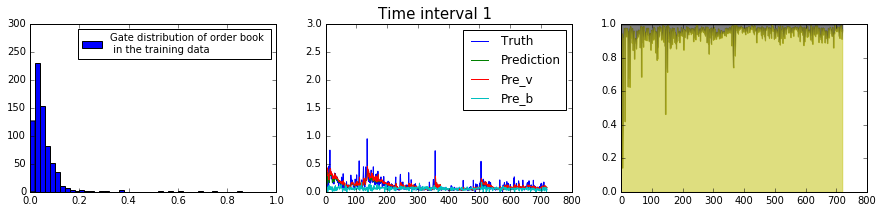

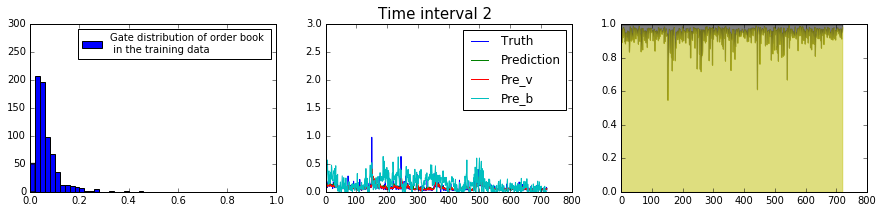

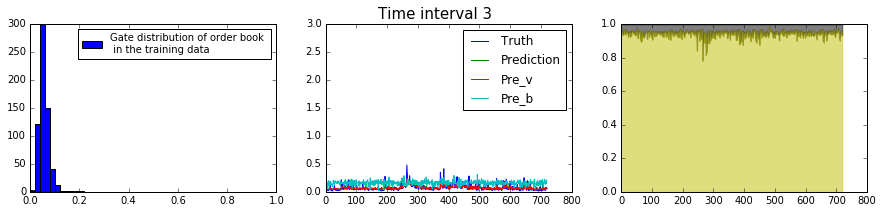

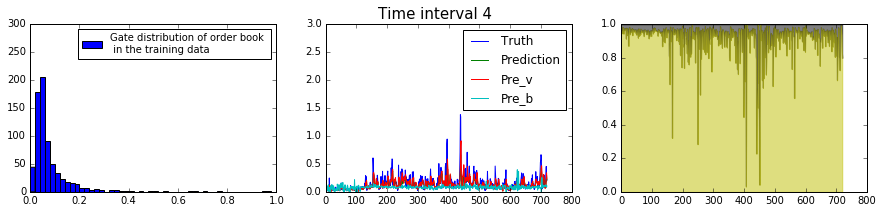

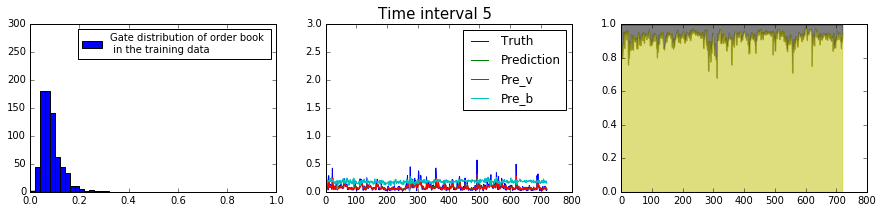

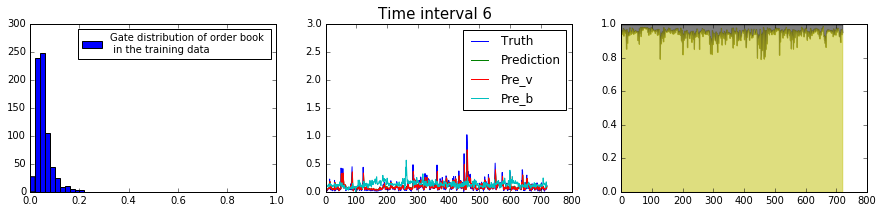

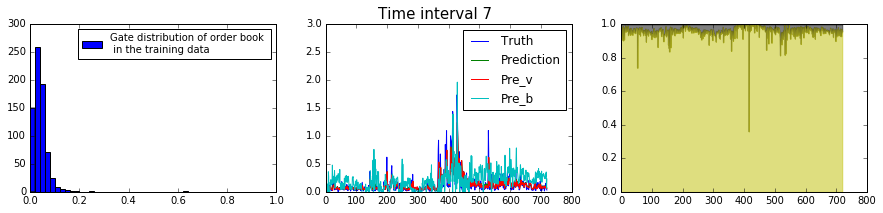

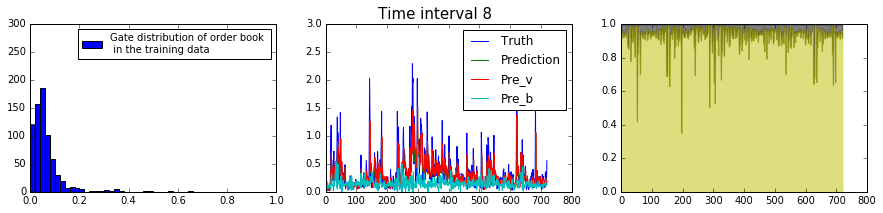

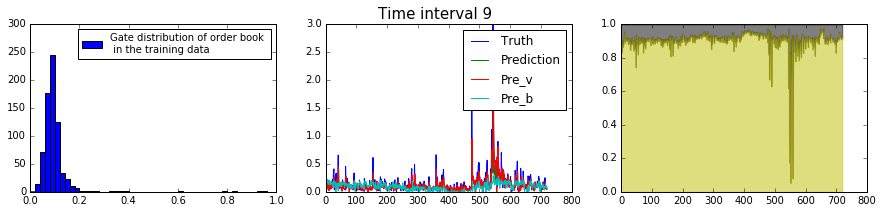

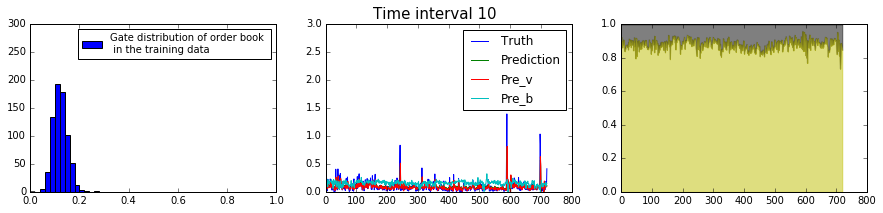

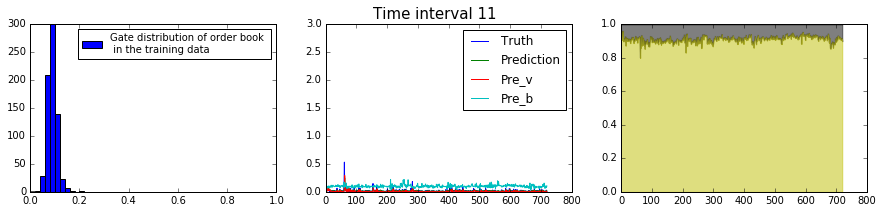

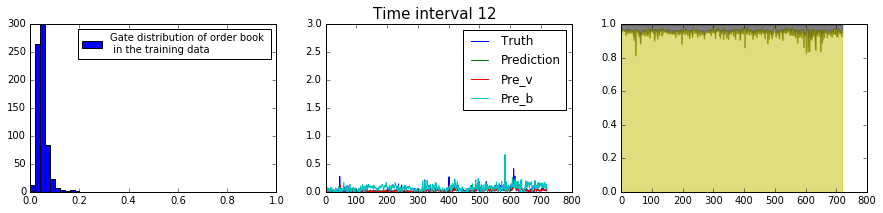

In [16]:
# testing data

for i in range(2, 14):
    
    
    # -- DATA
    
    # DATA truth in testing  
    file_name = str(i) + '_' + pre_ts + 'mix' + post_txt
    df_pre = pd.read_csv( file_path + file_name, sep=',', names = col_format_mix)
    
    # DATA gates in testing
    file_name = str(i) + '_' + gate_ts + post_txt
    df_gate = pd.read_csv( file_path + file_name, sep=',', names = col_format_gate )
    tmp_gate = np.asarray(df_gate)
    
    # -- PLOT
    
    fig, ax = plt.subplots(1, 3, figsize=(15,3))
    fig.suptitle("Time interval " + str(i-1), fontsize = 15)
    
    # hist
    ax[0].hist(df_gate['ob'], histtype='bar', bins = bin_bound,  \
               label='Gate distribution of order book \n in the training data ')
    ax[0].set_ylim(0,300)
    ax[0].legend(fontsize=10)
    
    # truth and prediction
    ax[1].plot(df_pre['truth'], label = 'Truth')
    ax[1].plot(df_pre['pre'], label = 'Prediction')
    ax[1].plot(df_pre['pre_v'], label = 'Pre_v')
    ax[1].plot(df_pre['pre_b'], label = 'Pre_b')
    ax[1].legend()
    ax[1].set_ylim(0,3)
    
    # gate distribution
    X = range(len(tmp_gate))
    Y =  [1.0 for k in tmp_gate ]
    Y1 = [k[0] for k in tmp_gate]
    Y2 = [0.0 for k in tmp_gate]
    
    ax[2].plot(Y, label = 'Order book', color='k', alpha=.5)
    ax[2].plot(Y1,label = 'Volatility', color = 'k', alpha=.1)
    ax[2].plot(Y2,)
    ax[2].fill_between(X, Y, Y1, color='k',alpha=.5)
    ax[2].fill_between(X, Y1,Y2, color='y',alpha=.5)
    

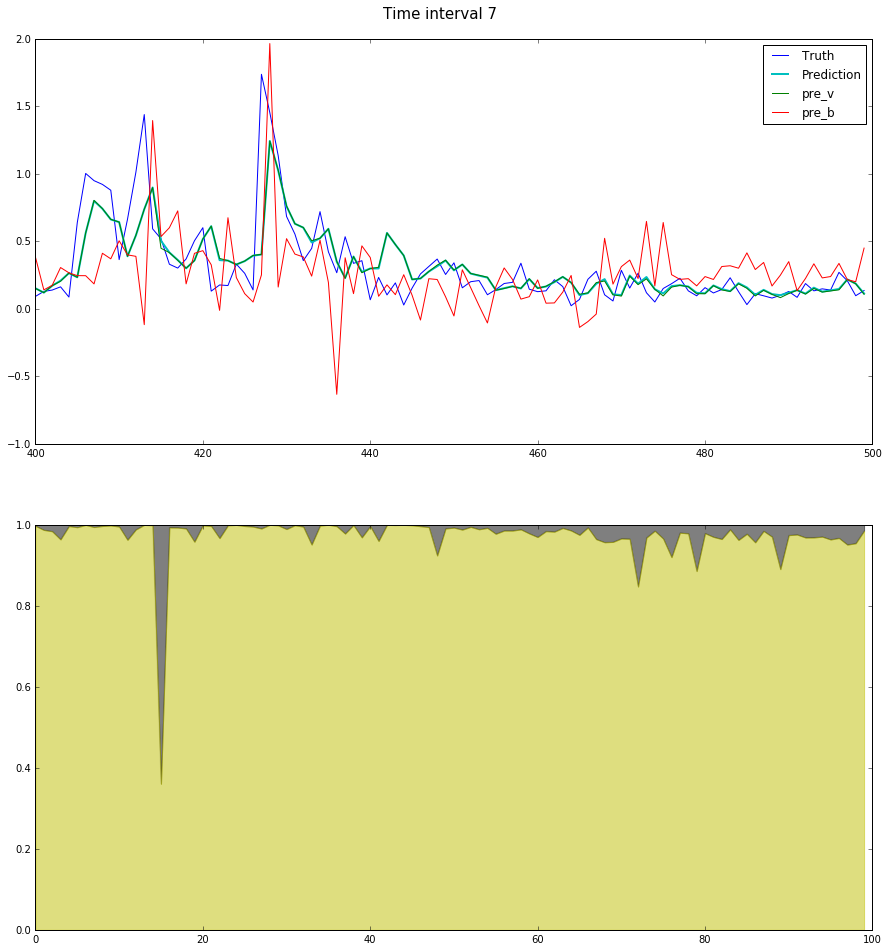

In [32]:
# investigation into a certain interval

# plt.ioff()
    
for i in range(8,9):
    
    # --- DATA
    
    # DATA truth target values in testing 
    file_name = str(i) + '_' + pre_ts + 'mix' + post_txt
    df_pre = pd.read_csv( file_path + file_name, sep=',', names = col_format_mix)
    
    # DATA gates in testing
    file_name = str(i) + '_' + gate_ts + post_txt
    df_gate = pd.read_csv( file_path + file_name, sep=',', names = col_format_gate )
    tmp_gate = np.asarray(df_gate)
    
    # DATA feature data
    data_path = "../dataset/bitcoin/training_data/rolling/" + str(i) + "_xtest_mix" + post_dat
    x = np.load(data_path)
    
    data_path = "../dataset/bitcoin/training_data/rolling/" + str(i) + "_ytest_mix" + post_dat
    y = np.load(data_path)
    
    # DATA gate parameters
    file_name = str(i) + weight_gate + post_dat
    gate_para = np.load(file_path + file_name)
    
    abs_gate_para = np.abs(gate_para) 
    
    # DATA expert parameters
    file_name = str(i) + weight_pre + post_dat
    exp_para = np.load(file_path + file_name)
    
    # auto-regressive volatility, features 
    vol = np.asarray( [k[0] for k in x] )
    ob  = np.asarray( [k[1] for k in x] )
#     print np.shape(vol), np.shape(ob)
    
    
    # --- plot
    
    fig, ax = plt.subplots(2, 1, figsize=(15,15))
    fig.suptitle("Time interval " + str(i-1), fontsize = 15)
    
    # truth and prediction
    df_pre = df_pre.iloc[400:500]
    ax[0].plot(df_pre['truth'], label = 'Truth')
    ax[0].plot(df_pre['pre'],   color ='c', label = 'Prediction', linewidth = 2)
    ax[0].plot(df_pre['pre_v'], label = 'pre_v')
    ax[0].plot(df_pre['pre_b'],   label = 'pre_b')
#     ax[0].set_ylim([0.0, 1.0])
    ax[0].legend()
    
    # gate distribution
    tmp_gate = tmp_gate[400:500]
    X = range(len(tmp_gate))
    Y =  [1.0 for k in tmp_gate ]
    Y1 = [k[0] for k in tmp_gate]
    Y2 = [0.0 for k in tmp_gate]
    
    ax[1].plot(Y, label = 'Order book', color='k', alpha=.5)
    ax[1].plot(Y1,label = 'Volatility', color = 'k', alpha=.1)
    ax[1].plot(Y2,)
    ax[1].fill_between(X, Y, Y1, color='k',alpha=.5)
    ax[1].fill_between(X, Y1,Y2, color='y',alpha=.5)
    
    plt.subplots_adjust(top=0.95)


In [18]:
# investigation into each interval

# TRAINING

# plt.ioff()
    
for i in range(2,14):
    
    # --- DATA
    
    # DATA truth target values in testing 
    file_name = str(i) + '_' + pre_tr + 'mix' + post_txt
    df_pre = pd.read_csv( file_path + file_name, sep=',', names = col_format_mix)
    
    # DATA gates in testing
    file_name = str(i) + '_' + gate_tr + post_txt
    df_gate = pd.read_csv( file_path + file_name, sep=',', names = col_format_gate )
    tmp_gate = np.asarray(df_gate)
    
    # DATA feature data
    data_path = "../dataset/bitcoin/training_data/rolling/" + str(i) + "_xtrain_mix" + post_dat
    x = np.load(data_path)
    
    data_path = "../dataset/bitcoin/training_data/rolling/" + str(i) + "_ytrain_mix" + post_dat
    y = np.load(data_path)
    
    # DATA gate parameters
    file_name = str(i) + weight_gate + post_dat
    gate_para = np.load(file_path + file_name)
    
    abs_gate_para = np.abs(gate_para) 
    
    # DATA expert parameters
    file_name = str(i) + weight_pre + post_dat
    exp_para = np.load(file_path + file_name)
    
    
    # auto-regressive volatility, features 
    vol = np.asarray( [k[0] for k in x] )
    ob  = np.asarray( [k[1] for k in x] )
    print np.shape(vol), np.shape(ob)
    
    # feature first
#     ob = np.transpose(ob, [2, 0, 1])
#     print  np.shape(ob)
    
    
    # data instances with certain gates 
    pos = []
    for j in range(len(tmp_gate)):
        if tmp_gate[j][1] >= 0.0 and tmp_gate[j][1] <= 1.0:
            pos.append(j)
    num = len(pos)
    
    # sample
    np.random.shuffle(pos)
    if num<100:
        cnt_sample = num
    else:
        cnt_sample = 100
    
    vol_sample = vol[pos[:cnt_sample]]
    ob_sample = ob[pos[:cnt_sample]]
    
    # feature first
    ob_sample = np.transpose(ob_sample, [2, 0, 1])
    
    
    # --- PLOT
    
#     print np.shape(ob[0])
    
    fig, ax = plt.subplots(5, 3, figsize=(15,15))
    fig.suptitle("Time interval " + str(i-1), fontsize = 15)
    
    # hist
    ax[0][0].hist(df_gate['ob'], histtype='bar', bins = bin_bound,  \
               label='Gate distribution of order book \n in the testing data ')
    ax[0][0].set_ylim(0,300)
    ax[0][0].legend(fontsize=10)
    
    # truth and prediction
    ax[0][1].plot(df_pre['truth'], label = 'Truth')
    ax[0][1].plot(df_pre['pre'],   label = 'Prediction')
    ax[0][1].plot(df_pre['pre_v'], label = 'pre_v')
    ax[0][1].plot(df_pre['pre_b'],   label = 'pre_b')
    ax[0][1].set_ylim([0.0, 3.0])
    ax[0][1].legend()
    
    
    # gate distribution
    X = range(len(tmp_gate))
    Y =  [1.0 for k in tmp_gate ]
    Y1 = [k[0] for k in tmp_gate]
    Y2 = [0.0 for k in tmp_gate]
    
    ax[0][2].plot(Y, label = 'Order book', color='k', alpha=.5)
    ax[0][2].plot(Y1,label = 'Volatility', color = 'k', alpha=.1)
    ax[0][2].plot(Y2,)
    ax[0][2].fill_between(X, Y, Y1, color='k',alpha=.5)
    ax[0][2].fill_between(X, Y1,Y2, color='y',alpha=.5)
    
    
    ob = np.transpose(ob, [2, 1, 0])
    print  np.shape(ob)
    
    max_ob = np.max(ob[0], 0)
    min_ob = np.min(ob[0], 0)
    ax[1][0].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[1][0].set_ylim([0,10])
    
    max_ob = np.max(ob[1], 0)
    min_ob = np.min(ob[1], 0)
    ax[1][1].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[1][1].set_ylim([0,10])
    
    max_ob = np.max(ob[2], 0)
    min_ob = np.min(ob[2], 0)
    ax[1][2].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[1][2].set_ylim([0,350])
    
    
    max_ob = np.max(ob[3], 0)
    min_ob = np.min(ob[3], 0)
    ax[2][0].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[2][0].set_ylim([0,500])
    
    max_ob = np.max(ob[4], 0)
    min_ob = np.min(ob[4], 0)
    ax[2][1].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[2][1].set_ylim([0,200])
    
    max_ob = np.max(ob[5], 0)
    min_ob = np.min(ob[5], 0)
    ax[2][2].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[2][2].set_ylim([0,5000])

    
    
    max_ob = np.max(ob[6], 0)
    min_ob = np.min(ob[6], 0)
    ax[3][0].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[3][0].set_ylim([0,5000])
    
    max_ob = np.max(ob[7], 0)
    min_ob = np.min(ob[7], 0)
    ax[3][1].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[3][1].set_ylim([-4000,4000])
    
    max_ob = np.max(ob[8], 0)
    min_ob = np.min(ob[8], 0)
    ax[3][2].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[3][2].set_ylim([0,2000])
    
    
    
    max_ob = np.max(ob[9], 0)
    min_ob = np.min(ob[9], 0)
    ax[4][0].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[4][0].set_ylim([0,4000])
    
    ax[4][1].bar(range(len(np.squeeze(abs_gate_para[2]))), np.flip(np.squeeze(abs_gate_para[2]),0) )
    ax[4][1].set_title('Temporal dependency on order book')
    ax[4][1].set(xlabel='Temporal lags')
    ax[4][1].set_ylim([0, 0.6])
    
    ax[4][2].bar( range(len(np.squeeze(abs_gate_para[3])) ), np.squeeze(abs_gate_para[3]))
    ax[4][2].set_title('Feature dependency on order book')
    tmp_ind = range(len(np.squeeze(abs_gate_para[3])))
    ax[4][2].set_ylim([0, 1.0])
    plt.xticks( tmp_ind , features_ob, rotation=50 )
    
    plt.subplots_adjust(top=0.95)
    fig.savefig('../bt_results/res/pics/train_' + str(i-1) + '.jpeg', bbox_inches='tight')
    plt.close()
    

(1440, 16) (1440, 30, 10)
(10, 30, 1440)
(1440, 16) (1440, 30, 10)
(10, 30, 1440)
(1440, 16) (1440, 30, 10)
(10, 30, 1440)
(1440, 16) (1440, 30, 10)
(10, 30, 1440)
(1440, 16) (1440, 30, 10)
(10, 30, 1440)
(1440, 16) (1440, 30, 10)
(10, 30, 1440)
(1440, 16) (1440, 30, 10)
(10, 30, 1440)
(1440, 16) (1440, 30, 10)
(10, 30, 1440)
(1440, 16) (1440, 30, 10)
(10, 30, 1440)
(1440, 16) (1440, 30, 10)
(10, 30, 1440)
(1440, 16) (1440, 30, 10)
(10, 30, 1440)
(1440, 16) (1440, 30, 10)
(10, 30, 1440)


In [17]:
# investigation into each interval

# TESTING

# plt.ioff()
    
for i in range(2,14):
    
    # --- DATA
    
    # DATA truth target values in testing 
    file_name = str(i) + '_' + pre_ts + 'mix' + post_txt
    df_pre = pd.read_csv( file_path + file_name, sep=',', names = col_format_mix)
    
    # DATA gates in testing
    file_name = str(i) + '_' + gate_ts + post_txt
    df_gate = pd.read_csv( file_path + file_name, sep=',', names = col_format_gate )
    tmp_gate = np.asarray(df_gate)
    
    # DATA feature data
    data_path = "../dataset/bitcoin/training_data/rolling/" + str(i) + "_xtest_mix" + post_dat
    x = np.load(data_path)
    
    data_path = "../dataset/bitcoin/training_data/rolling/" + str(i) + "_ytest_mix" + post_dat
    y = np.load(data_path)
    
    # DATA gate parameters
    file_name = str(i) + weight_gate + post_dat
    gate_para = np.load(file_path + file_name)
    
    abs_gate_para = np.abs(gate_para) 
    
    # DATA expert parameters
    file_name = str(i) + weight_pre + post_dat
    exp_para = np.load(file_path + file_name)
    
    
    # auto-regressive volatility, features 
    vol = np.asarray( [k[0] for k in x] )
    ob  = np.asarray( [k[1] for k in x] )
    print np.shape(vol), np.shape(ob)
    
    # feature first
#     ob = np.transpose(ob, [2, 0, 1])
#     print  np.shape(ob)
    
    
    # data instances with certain gates 
    pos = []
    for j in range(len(tmp_gate)):
        if tmp_gate[j][1] >= 0.0 and tmp_gate[j][1] <= 1.0:
            pos.append(j)
    num = len(pos)
    
    # sample
    np.random.shuffle(pos)
    if num<100:
        cnt_sample = num
    else:
        cnt_sample = 100
    
    vol_sample = vol[pos[:cnt_sample]]
    ob_sample = ob[pos[:cnt_sample]]
    
    # feature first
    ob_sample = np.transpose(ob_sample, [2, 0, 1])
    
    
    # --- PLOT
    
#     print np.shape(ob[0])
    
    fig, ax = plt.subplots(5, 3, figsize=(15,15))
    fig.suptitle("Time interval " + str(i-1), fontsize = 15)
    
    # hist
    ax[0][0].hist(df_gate['ob'], histtype='bar', bins = bin_bound,  \
               label='Gate distribution of order book \n in the testing data ')
    ax[0][0].set_ylim(0,300)
    ax[0][0].legend(fontsize=10)
    
    # truth and prediction
    ax[0][1].plot(df_pre['truth'], label = 'Truth')
    ax[0][1].plot(df_pre['pre'],   label = 'Prediction')
    ax[0][1].plot(df_pre['pre_v'], label = 'pre_v')
    ax[0][1].plot(df_pre['pre_b'],   label = 'pre_b')
    ax[0][1].set_ylim([0.0, 3.0])
    ax[0][1].legend()
    
    
    # gate distribution
    X = range(len(tmp_gate))
    Y =  [1.0 for k in tmp_gate ]
    Y1 = [k[0] for k in tmp_gate]
    Y2 = [0.0 for k in tmp_gate]
    
    ax[0][2].plot(Y, label = 'Order book', color='k', alpha=.5)
    ax[0][2].plot(Y1,label = 'Volatility', color = 'k', alpha=.1)
    ax[0][2].plot(Y2,)
    ax[0][2].fill_between(X, Y, Y1, color='k',alpha=.5)
    ax[0][2].fill_between(X, Y1,Y2, color='y',alpha=.5)
    
    
    ob = np.transpose(ob, [2, 1, 0])
    print  np.shape(ob)
    
    max_ob = np.max(ob[0], 0)
    min_ob = np.min(ob[0], 0)
    ax[1][0].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[1][0].set_ylim([0,10])
    
    max_ob = np.max(ob[1], 0)
    min_ob = np.min(ob[1], 0)
    ax[1][1].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[1][1].set_ylim([0,10])
    
    max_ob = np.max(ob[2], 0)
    min_ob = np.min(ob[2], 0)
    ax[1][2].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[1][2].set_ylim([0,350])
    
    
    max_ob = np.max(ob[3], 0)
    min_ob = np.min(ob[3], 0)
    ax[2][0].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[2][0].set_ylim([0,500])
    
    max_ob = np.max(ob[4], 0)
    min_ob = np.min(ob[4], 0)
    ax[2][1].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[2][1].set_ylim([0,200])
    
    max_ob = np.max(ob[5], 0)
    min_ob = np.min(ob[5], 0)
    ax[2][2].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[2][2].set_ylim([0,5000])

    
    
    max_ob = np.max(ob[6], 0)
    min_ob = np.min(ob[6], 0)
    ax[3][0].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[3][0].set_ylim([0,5000])
    
    max_ob = np.max(ob[7], 0)
    min_ob = np.min(ob[7], 0)
    ax[3][1].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[3][1].set_ylim([-4000,4000])
    
    max_ob = np.max(ob[8], 0)
    min_ob = np.min(ob[8], 0)
    ax[3][2].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[3][2].set_ylim([0,2000])
    
    
    
    max_ob = np.max(ob[9], 0)
    min_ob = np.min(ob[9], 0)
    ax[4][0].fill_between(X, max_ob, min_ob, color='k',alpha=.5)
    ax[4][0].set_ylim([0,4000])
    
    ax[4][1].bar(range(len(np.squeeze(abs_gate_para[2]))), np.flip(np.squeeze(abs_gate_para[2]),0) )
    ax[4][1].set_title('Temporal dependency on order book')
    ax[4][1].set(xlabel='Temporal lags')
    ax[4][1].set_ylim([0, 0.6])
    
    ax[4][2].bar( range(len(np.squeeze(abs_gate_para[3])) ), np.squeeze(abs_gate_para[3]))
    ax[4][2].set_title('Feature dependency on order book')
    tmp_ind = range(len(np.squeeze(abs_gate_para[3])))
    ax[4][2].set_ylim([0, 1.0])
    plt.xticks( tmp_ind , features_ob, rotation=50 )
    
    plt.subplots_adjust(top=0.95)
    fig.savefig('../bt_results/res/pics/test_' + str(i-1) + '.jpeg', bbox_inches='tight')
    plt.close()
    

(720, 16) (720, 30, 10)
(10, 30, 720)
(720, 16) (720, 30, 10)
(10, 30, 720)
(720, 16) (720, 30, 10)
(10, 30, 720)
(720, 16) (720, 30, 10)
(10, 30, 720)
(720, 16) (720, 30, 10)
(10, 30, 720)
(720, 16) (720, 30, 10)
(10, 30, 720)
(720, 16) (720, 30, 10)
(10, 30, 720)
(720, 16) (720, 30, 10)
(10, 30, 720)
(720, 16) (720, 30, 10)
(10, 30, 720)
(720, 16) (720, 30, 10)
(10, 30, 720)
(720, 16) (720, 30, 10)
(10, 30, 720)
(720, 16) (720, 30, 10)
(10, 30, 720)


In [655]:

# residual investigation

def residual_cmparison_sig_test(models, file_path, prefix, file_col_names):
    
    postfix = '.txt'

    mix_ts = prefix + 'mix' + postfix
    mix_df = pd.read_csv( file_path + mix_ts, sep=',', names = file_col_names )
    mix_res = mix_df['truth'] - mix_df['pre']
    
    for i in models:
        
        tmp_path = prefix_ts + i + postfix
        tmp_df = pd.read_csv(file_path + tmp_path, sep=',', names = ['truth', 'pre'])
    
        tmp_res = tmp_df['truth'] - tmp_df['pre']
    
        print  i, ':', stats.ks_2samp( np.asarray(mix_res), np.asarray(tmp_res) )
        
def residual_test(models, file_path, prefix, file_col_names):
    
    postfix = '.txt'

    mix_ts = prefix + 'mix' + postfix
    mix_df = pd.read_csv( file_path + mix_ts, sep=',', names = file_col_names)
    mix_res = mix_df['truth'] - mix_df['pre']
    
    print 'mix', stats.kstest(np.asarray(mix_res), 'norm')
    
    print sm.stats.diagnostic.acorr_ljungbox(np.asarray(mix_res), lags = 5, boxpierce=False)[1]
    
#     print acf(  mix_res)  
#     print pacf( mix_res )
    
    for i in models:
        
        tmp_path = prefix_ts + i + postfix
        tmp_df = pd.read_csv(file_path + tmp_path, sep=',', names = ['truth', 'pre'])
    
        tmp_res = tmp_df['truth'] - tmp_df['pre']
    
        print i,':', stats.kstest(np.asarray(tmp_res), 'norm')
        
        print 'test for no autocorrelation: ', \
        sm.stats.diagnostic.acorr_ljungbox(np.asarray(tmp_res), lags = 5, boxpierce=False)[1]
        
        
def residual_plot(models, file_path, prefix, file_col_names):
    
    fig, ax = plt.subplots()
    fig.set_size_inches( 17,8 )
    
    postfix = '.txt'

    mix_ts = prefix + 'mix' + postfix
    mix_df = pd.read_csv( file_path + mix_ts, sep=',', names = file_col_names)
    mix_res = mix_df['truth'] - mix_df['pre']
    
    ax.plot(mix_res, lw=1, label = 'mixture')
    
#     for i in models:
        
#         tmp_path = prefix_ts + i + postfix
#         tmp_df = pd.read_csv(file_path + tmp_path, sep=',', names = ['truth', 'pre'])
    
#         tmp_res = tmp_df['truth'] - tmp_df['pre']
    
#         print i,':', stats.kstest(np.asarray(tmp_res), 'norm')
        
#         ax.plot( tmp_res, lw = 1, label = i )
    
    ax.legend( loc=0)
    ax.set_ylim(-1.5, 1.5)
    
def mixture_weight_condition_on_vol( gate, y, lower, upper ):
   
    tmpv = []
    tmpob= []
    gate = np.asarray(gate)
    for i in range(1,len(gate)):
        tmp_v =  gate[i][0]
        tmp_ob = gate[i][1]
        
        if y[i] >=lower and y[i]<=upper:
            tmpv.append(tmp_v)
            tmpob.append(tmp_ob)
    
    print lower, upper, " : ", len(tmpv), mean(tmpv), mean(tmpob),' p-value: ', sp.stats.ttest_ind(tmpv,tmpob)[1]


In [695]:
# ---- conditional error evaluation ----

# gate interval: error of mixture, errors of baseline models

models = ['gbt', 'rf', 'xgt', 'bayes', 'lasso', 'gp', 'enet', 'ridge']
#, 'arima'
#'arimax'
#'str', 'strx', 
# , 'garch', 'egarch'

def err_conditional_on_gate( gate_range, gate, models, path, prefix ):
    
    pos = []
    for i in range(len(gate)):
        if gate[i][1]>gate_range[0] and gate[i][1]<gate_range[1]:
            pos.append(i)
    num = len(pos)
    print num
    
    postfix = '.txt'
    mix_name = prefix + 'mix' + postfix
    mix_df = pd.read_csv( path + mix_name, sep=',', names = ['truth', 'pre', 'pre_v', 'pre_b'] )
    
    mix_arr = np.asarray(mix_df[['truth','pre']])
    mix_pos = mix_arr[pos]
    print len(mix_pos)
    
    tr = np.transpose(mix_pos,[1,0])[0]
    pre = np.transpose(mix_pos,[1,0])[1]
    
    print 'mix', sqrt(mean((tr-pre)*(tr-pre)))

    for i in models:
        
        print i
        
        file_name = prefix + i + postfix
        tmp_df = pd.read_csv(path + file_name, sep=',', names = ['truth', 'pre'])
        
        tmp_arr = np.asarray(tmp_df[['truth','pre']])
        tmp_pos = tmp_arr[pos]
#         print len(mix_pos)
    
        tr = np.transpose(tmp_pos,[1,0])[0]
        pre = np.transpose(tmp_pos,[1,0])[1]
        print  sqrt(mean((tr-pre)*(tr-pre)))


In [685]:
# visualize patterns of mixtures

def pattern_conditional_on_gate( gate_range, gate, dta_v, dta_distr, ylimits, ydata ):
    pos = []
    for i in range(len(gate)):
        if gate[i][1]>gate_range[0] and gate[i][1]<gate_range[1]:
            pos.append(i)
    num = len(pos)
    print num
    
    
    np.random.shuffle(pos)
    if num<100:
        cnt_sample = num
    else:
        cnt_sample = 100
        
    
    tmplen   = 10
    subseq_y = []
    for i in range(cnt_sample):
        if pos[i] + tmplen < len(ydata):
            subseq_y.append( ydata[pos[i]:pos[i]+tmplen] )
    
    subseq_y = np.asarray(subseq_y)
    vsample = dta_v[pos[:cnt_sample]]
    dsample = dta_distr[pos[:cnt_sample]]
    print np.shape(vsample), np.shape(dsample)


    # plot auto-regressive and subsequent volatility
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,5))
    # fig.set_size_inches( 18,7 )
    ax1.boxplot(vsample);
    ax1.set_ylim(0,5.0)
    
    ax2.boxplot(subseq_y);
    ax2.set_ylim(0,5.0)
    
    
    # plot order book feature patterns
    trans_dsample = np.transpose(dsample, [2, 0, 1])

    fig, ax_list = plt.subplots(2, 5, figsize=(19,10))
    for i in range(2):
        for j in range(5):
            
            feature_idx = i*5+j
            step_data = []

            ax_list[i][j].boxplot( trans_dsample[feature_idx] )
            ax_list[i][j].set_ylim( ylimits[feature_idx][0], ylimits[feature_idx][1] )

# ----



30 10
(8500, 16) (8500, 30, 10)


In [654]:
pattern_conditional_on_gate( [0.0, 0.2], gate_tr, dta_v, dta_distr, ylimits, ytrain )

pattern_conditional_on_gate( [0.2, 0.4], gate_tr, dta_v, dta_distr, ylimits, ytrain )

pattern_conditional_on_gate( [0.4, 0.6], gate_tr, dta_v, dta_distr, ylimits, ytrain )

pattern_conditional_on_gate( [0.6, 1.0], gate_tr, dta_v, dta_distr, ylimits, ytrain )

In [ ]:
def errorfill(x, y, yerr, interval, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.color_cycle.next()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color)
    ax.set_ylim(interval)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

In [283]:
def mixture_gate_condition_on_vol( pre, gate, y, lower, upper ):
   
    tmpv = []
    tmpob= []

    gatev = []
    gateob= []
    
    gate = np.asarray(gate)
    pre = np.asarray(pre)
    
    gateup = 0
    
    for i in range(1,len(gate)):
        tmp_v =  pre[i][2]
        tmp_ob = pre[i][3]
        
        g_v =  gate[i][0]
        g_ob = gate[i][1]
        
        if pre[i][0] >=lower and pre[i][0]<=upper and  pre[i][0] < pre[i-1][0] :
            tmpv.append(tmp_v)
            tmpob.append(tmp_ob)
            
            gatev.append(g_v)
            gateob.append(g_ob)
            
            if g_ob < gate[i-1][1]:
                gateup+=1
            
    
    print lower, upper, " : ", len(tmpv), mean(tmpv), mean(gatev), \
    mean(tmpob), mean(gateob), gateup/(len(gateob)+1e-10), gateup, len(gateob) 
#     ' p-value: ', sp.stats.ttest_ind(tmpv,tmpob)[1]

mix_pre_train = pd.read_csv(file_path + 'pytrain_mix.txt', sep=',', names = name_format)
mix_pre_test  = pd.read_csv(file_path + 'pytest_mix.txt',  sep=',', names = name_format)


print 'Training:'
for i in range(0,60):
    mixture_gate_condition_on_vol( mix_pre_train, gate_tr, ytrain, 0.01*i, 0.01*(i+1) )
    
    
print '\nTesting:'
for i in range(1,50):
    mixture_gate_condition_on_vol( mix_pre_test, gate_ts, ytest, 0.01*i, 0.01*(i+1) )

Training:
0.0 0.01  :  45 0.0541385329432 0.908192927308 -0.0883380864643 0.0918070665949 0.555555555554 25 45
0.01 0.02  :  288 0.0431761166288 0.936211018306 -0.171541982363 0.0637889801876 0.541666666666 156 288
0.02 0.03  :  500 0.0560065115988 0.926711458325 -0.112835773084 0.0732885434028 0.516 258 500
0.03 0.04  :  570 0.067134998595 0.914050471574 -0.0906714352175 0.0859495296777 0.501754385965 286 570
0.04 0.05  :  503 0.0805387560641 0.905677115882 -0.0722855504595 0.0943228833445 0.506958250497 255 503
0.05 0.06  :  366 0.101437634498 0.899042178617 -0.0514684366011 0.100957824812 0.551912568306 202 366
0.06 0.07  :  317 0.117937034072 0.875692636997 -0.0185845213875 0.124307362361 0.501577287066 159 317
0.07 0.08  :  272 0.131102655439 0.870749372222 -0.00581833588726 0.129250624997 0.485294117647 132 272
0.08 0.09  :  200 0.145748059116 0.859134736508 0.0185963538941 0.140865263102 0.51 102 200
0.09 0.1  :  175 0.163224634486 0.849291757856 0.0104665811147 0.150708245708 0

In [ ]:
'''
# backup

#---- log sq ----

test_df = pd.read_csv('res/pytest.txt',    sep=',', names = ['pred', 'true'])
gate_tr = pd.read_csv('res/gate_train.txt',sep=',', names = ['vol','ob'])
gate_ts = pd.read_csv('res/gate_test.txt', sep=',', names = ['vol','ob'])
print test_df.shape, gate_tr.shape, gate_ts.shape

plot_horizon = 20
plot_prediction_truth('res/pytest.txt', 'Mixture linear', plot_horizon)
tmp_gate =  np.asarray(gate_ts.iloc[:plot_horizon])

# for i in range(3, len(tmp_gate)-3):
#      tmp_gate[i][0] = mean([tmp_gate[j][0] for j in range(i-1, i+1)])

X = range(len(tmp_gate))
Y =  [1.0 for i in tmp_gate ]
Y1 = [i[0] for i in tmp_gate]
Y2 = [0.0 for i in tmp_gate]

fig, ax = plt.subplots()
fig.set_size_inches( 18,7 )

ax.plot(Y, label = 'Order book', color='k', alpha=.5)
ax.plot(Y1,label = 'Volatility', color = 'y')
ax.plot(Y2,)
plt.fill_between(X, Y, Y1, color='k',alpha=.5)
plt.fill_between(X, Y1,Y2, color='y',alpha=.5)

ax.legend(loc=0)

#---- sq ----

test_df = pd.read_csv('../bt_results/res/pytest.txt',    sep=',', names = ['pred', 'true'])
gate_tr = pd.read_csv('../bt_results/res/gate_train.txt',sep=',', names = ['vol','ob'])
gate_ts = pd.read_csv('../bt_results/res/gate_test.txt', sep=',', names = ['vol','ob'])
print test_df.shape, gate_tr.shape, gate_ts.shape

plot_l = 0
plot_r = 250

plot_prediction_truth('../bt_results/res/pytest.txt', 'Mixture linear', plot_l, plot_r)
tmp_gate =  np.asarray(gate_ts.iloc[plot_l:plot_r])

#for i in range(3, len(tmp_gate)-3):
 #    tmp_gate[i][0] = mean([tmp_gate[j][0] for j in range(i-1, i+1)])

X = range(len(tmp_gate))
Y =  [1.0 for i in tmp_gate ]
Y1 = [i[0] for i in tmp_gate]
Y2 = [0.0 for i in tmp_gate]

fig, ax = plt.subplots()
fig.set_size_inches( 18,7 )

ax.plot(Y, label = 'Order book', color='k', alpha=.5)
ax.plot(Y1,label = 'Volatility', color = 'y')
ax.plot(Y2,)
plt.fill_between(X, Y, Y1, color='k',alpha=.5)
plt.fill_between(X, Y1,Y2, color='y',alpha=.5)

ax.legend(loc=0)